In [1]:
#basic
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

#cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder # one hot coding
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Standarization
# Import module for k-protoype cluster
from kmodes.kmodes import KModes
from collections import Counter, defaultdict # coun the number of samples in each cluster


#plot
import matplotlib.pyplot as plt
# Import module for data visualization
from plotnine import *
import plotnine
# Use the theme of ggplot
plt.style.use('ggplot')


### Original data with Kmodes

In [2]:
# Reference: https://medium.com/geekculture/the-k-modes-as-clustering-algorithm-for-categorical-data-type-bcde8f95efd7
df = pd.read_csv("transactions_n100000.csv")
df.head()

# Split time and date into month and hour
new = df["order_timestamp"].str.split(" ", expand = True)
month = new[0].str.split("-",expand = True)[1]
hour = new[1].str.split(":",expand=True)[0]
df['month'] = month
df['hour'] = hour
df.drop('order_timestamp', axis=1, inplace=True)

# drop latitude and longitude
df.drop(columns = ['lat',"long","ticket_id"], axis=1, inplace=True)

df

,location,item_name,item_count,month,hour
0,4,shake,2,02,18
1,4,burger,2,02,18
2,4,fries,2,02,18
3,5,burger,1,09,11
4,5,salad,2,09,11
...,...,...,...,...,...
260736,9,burger,3,05,17
260737,9,salad,1,05,17
260738,9,fries,4,05,17
260739,2,burger,3,12,00


In [3]:
print(df.info())
#change location into an object
df["location"] = df["location"].astype("str")
df["item_count"] = df["item_count"].astype("str")
print(df.info())
df.select_dtypes('object').nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260741 entries, 0 to 260740
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   location    260741 non-null  int64 
 1   item_name   260741 non-null  object
 2   item_count  260741 non-null  int64 
 3   month       260741 non-null  object
 4   hour        260741 non-null  object
dtypes: int64(2), object(3)
memory usage: 9.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260741 entries, 0 to 260740
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   location    260741 non-null  object
 1   item_name   260741 non-null  object
 2   item_count  260741 non-null  object
 3   month       260741 non-null  object
 4   hour        260741 non-null  object
dtypes: object(5)
memory usage: 9.9+ MB
None


location       9
item_name      4
item_count     5
month         12
hour          15
dtype: int64

In [4]:
# Select the categorical columns
cols = df.select_dtypes('object').columns # eliminated "item_count"
df_cat = df[cols]
# Show the data
print(df_cat.head())
# Check missing value
df_cat.isna().sum() # no missing value

  location item_name item_count month hour
0        4     shake          2    02   18
1        4    burger          2    02   18
2        4     fries          2    02   18
3        5    burger          1    09   11
4        5     salad          2    09   11


location      0
item_name     0
item_count    0
month         0
hour          0
dtype: int64

In [5]:
# Convert dataframe to matrix
dfMatrix = df_cat.to_numpy()
dfMatrix

array([['4', 'shake', '2', '02', '18'],
       ['4', 'burger', '2', '02', '18'],
       ['4', 'fries', '2', '02', '18'],
       ...,
       ['9', 'fries', '4', '05', '17'],
       ['2', 'burger', '3', '12', '00'],
       ['2', 'fries', '3', '12', '00']], dtype=object)

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


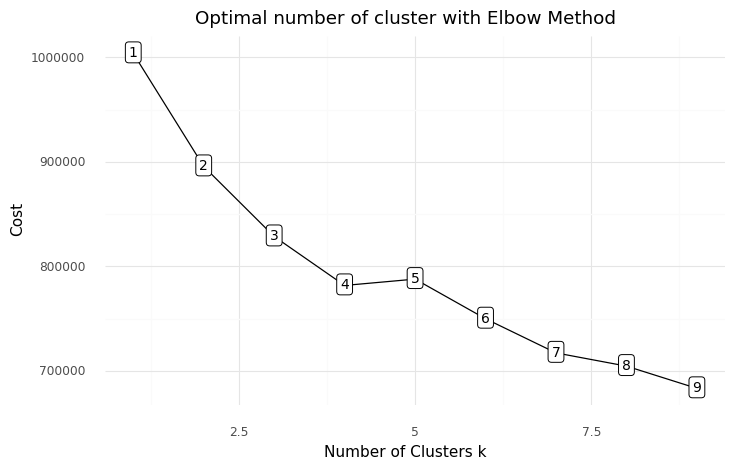

<ggplot: (8776206393591)>

In [6]:
# Choosing optimal K
cost = []
for cluster in range(1, 10):
    try:
        kmodes = KModes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kmodes.fit_predict(dfMatrix)
        cost.append(kmodes.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break
        
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster': range(1, 10), 'Cost': cost})

# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [7]:
# Fit the cluster with cluster = 4
kmodes = KModes(n_jobs = -1, n_clusters = 4, init = 'Huang', random_state = 0)
kmodes.fit_predict(dfMatrix)

kmodes.cluster_centroids_

array([['4', 'shake', '3', '06', '19'],
       ['2', 'fries', '1', '11', '00'],
       ['7', 'fries', '2', '01', '13'],
       ['9', 'burger', '4', '12', '18']], dtype='<U6')

In [8]:
# Fit the cluster with cluster = 6
kmodes = KModes(n_jobs = -1, n_clusters = 5, init = 'Huang', random_state = 0)
kmodes.fit_predict(dfMatrix)

kmodes.cluster_centroids_

array([['1', 'shake', '1', '12', '13'],
       ['2', 'fries', '2', '11', '00'],
       ['7', 'burger', '4', '04', '18'],
       ['4', 'fries', '4', '07', '18'],
       ['7', 'shake', '1', '10', '01']], dtype='<U6')

In [ ]:
#pd.read_csv("transactions_n100000.csv")[df["location"] == "9"]

### Pivot table with Kmeans

In [9]:
df_pv = pd.read_excel("transactions_n100000_pivot.xlsx")
df_pv.fillna(0,inplace = True) # fill all the missing values with 0

In [224]:
#df_pv.drop(columns= ["Grand Total"], axis=1, inplace=True) # drop columns "ticket id" and "grand total"
df_pv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ticket_id  100000 non-null  object 
 1   burger     100000 non-null  float64
 2   fries      100000 non-null  int64  
 3   salad      100000 non-null  float64
 4   shake      100000 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.8+ MB


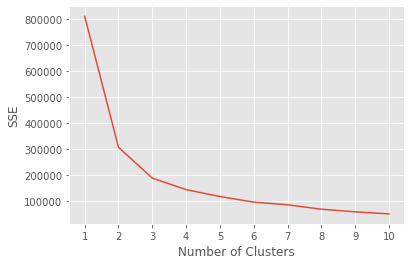

In [10]:
# Run the k means model with elbow test
sse_ls = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_pv.drop('ticket_id',axis=1)) # drop ticket id in the model
    sse_ls.append(kmeans.inertia_)

plt.plot(range(1, 11), sse_ls)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [11]:
# cluster of 3
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(df_pv.drop('ticket_id',axis=1))
kmeans.cluster_centers_

array([[3.93799921, 4.08471913, 0.14671992, 3.36778185],
       [1.21417669, 1.49333496, 0.27915827, 0.38647048],
       [0.28978587, 2.88993355, 2.60014767, 0.11223234]])

In [12]:
# The number of samples in each cluster is shown as below
print(Counter(kmeans.labels_))

Counter({1: 49137, 0: 30548, 2: 20315})


In [13]:
# Create an index for cluster interpretation

# Columns for centroids
list_col = ['burger', 'fries', 'salad','shake']
# Create an index for cluster interpretation
#index = ['First Cluster', 'Second Cluster', 'Third Cluster',"Fourth Cluster"]

# Create the data frame
pd.DataFrame(kmeans.cluster_centers_, columns = list_col)

,burger,fries,salad,shake
0,3.937999,4.084719,0.146720,3.367782
1,1.214177,1.493335,0.279158,0.386470
2,0.289786,2.889934,2.600148,0.112232


### Kmeans with all data

In [14]:
# cluster with month, time, and location

# 1. merge the data frame with month and time

df_full = pd.read_csv("transactions_n100000.csv")

# Split time and date into month and hour
new = df_full["order_timestamp"].str.split(" ", expand = True)
month = new[0].str.split("-",expand = True)[1]
hour = new[1].str.split(":",expand=True)[0]
df_full['month'] = month
df_full['hour'] = hour
df_full.drop('order_timestamp', axis=1, inplace=True)
df_full.drop_duplicates("ticket_id",keep = "first",inplace = True) # keep only the unique ticket_id
df_final = df_pv.merge(df_full, "left", on = "ticket_id")

In [16]:
# drop location, item_name, lat, long,item_count
df_final.drop(columns = ['item_name',"item_count","lat","long"], axis=1, inplace=True)

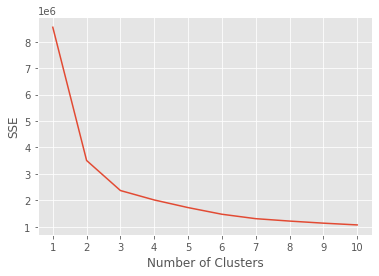

In [17]:
# Run the k means model with elbow test
sse_ls = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_final.drop('ticket_id',axis=1)) # drop ticket id in the model
    sse_ls.append(kmeans.inertia_)

plt.plot(range(1, 11), sse_ls)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [18]:
# cluster of 3
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(df_final.drop('ticket_id',axis=1))
kmeans.cluster_centers_

array([[ 3.17061563,  3.37089915,  0.20028352,  2.8135885 ,  5.93674058,
         6.51078372, 18.74420312],
       [ 1.75687148,  1.81371821,  0.05684672,  0.32537408,  4.25038028,
         6.52180834,  0.19215395],
       [ 0.33912558,  2.24752537,  1.90839979,  0.11800664,  4.50389425,
         6.49716077, 12.22114997]])

In [19]:
# Create an index for cluster interpretation

# Columns for centroids
list_col = ['burger', 'fries', 'salad','shake','location','month','hour']
# Create an index for cluster interpretation
#index = ['First Cluster', 'Second Cluster', 'Third Cluster',"Fourth Cluster"]

# Create the data frame
pd.DataFrame(kmeans.cluster_centers_, columns = list_col)

,burger,fries,salad,shake,location,month,hour
0,3.170616,3.370899,0.200284,2.813588,5.936741,6.510784,18.744203
1,1.756871,1.813718,0.056847,0.325374,4.250380,6.521808,0.192154
2,0.339126,2.247525,1.908400,0.118007,4.503894,6.497161,12.221150


In [21]:
# The number of samples in each cluster is shown as below
print(Counter(kmeans.labels_))

Counter({0: 39504, 2: 32227, 1: 28269})


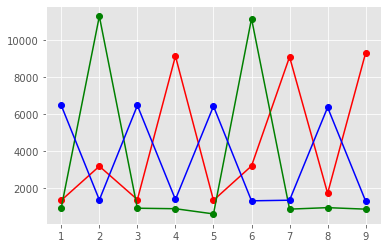

In [186]:
df_final['clusters'] = kmeans.labels_
# Divide the data into three clusters
cl_1 = df_final[df_final["clusters"] == 0]
cl_2 = df_final[df_final["clusters"] == 1]
cl_3 = df_final[df_final["clusters"] == 2]

# create location data frame with number of transactions in each cluster in each month
def trans_to_location(cluster):
    return pd.DataFrame(sorted(cluster["location"].value_counts().to_dict().items()))[1]

# list(sorted(set(df_final["hour"].values))) will return the sorted hour of our data
cluster_location_df = pd.DataFrame()
cluster_location_df["location"] = list(sorted(set(df_final["location"].values)))
cluster_location_df["cluster1"] = trans_to_location(cl_1)
cluster_location_df["cluster2"] = trans_to_location(cl_2)
cluster_location_df["cluster3"] = trans_to_location(cl_3)

plt.plot(cluster_location_df["location"], cluster_location_df["cluster1"], color='red', marker='o')
plt.plot(cluster_location_df["location"], cluster_location_df["cluster2"], color='green', marker='o')
plt.plot(cluster_location_df["location"], cluster_location_df["cluster3"], color='blue', marker='o')

### !!! Kmeans with out including time in the clustering model

In [22]:
# cluster with month, time, and location

# 1. merge the data frame with month and time

df_full = pd.read_csv("transactions_n100000.csv")

# Split time and date into month and hour
new = df_full["order_timestamp"].str.split(" ", expand = True)
month = new[0].str.split("-",expand = True)[1]
hour = new[1].str.split(":",expand=True)[0]
df_full['month'] = month
df_full['hour'] = hour
df_full.drop('order_timestamp', axis=1, inplace=True)
df_full.drop_duplicates("ticket_id",keep = "first",inplace = True) # keep only the unique ticket_id
df_final = df_pv.merge(df_full, "left", on = "ticket_id")

# drop item_name, lat, long,item_count
df_final.drop(columns = ['item_name',"item_count","lat","long"], axis=1, inplace=True)

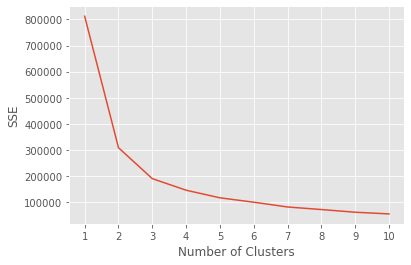

In [23]:
# Run the k means model with elbow test
sse_ls = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_final.drop(columns = ['ticket_id','location','month','hour'],axis=1)) # drop ticket id in the model
    sse_ls.append(kmeans.inertia_)

plt.plot(range(1, 11), sse_ls)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [26]:
# cluster of 3
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(df_final.drop(columns = ['ticket_id','location','month','hour'],axis=1))
kmeans.cluster_centers_

array([[3.93799921, 4.08471913, 0.14671992, 3.36778185],
       [1.21417669, 1.49333496, 0.27915827, 0.38647048],
       [0.28978587, 2.88993355, 2.60014767, 0.11223234]])

In [27]:
# Create an index for cluster interpretation

# Columns for centroids
list_col = ['burger', 'fries', 'salad','shake']
# Create an index for cluster interpretation
#index = ['First Cluster', 'Second Cluster', 'Third Cluster',"Fourth Cluster"]

# Create the data frame
pd.DataFrame(kmeans.cluster_centers_, columns = list_col)

,burger,fries,salad,shake
0,3.937999,4.084719,0.146720,3.367782
1,1.214177,1.493335,0.279158,0.386470
2,0.289786,2.889934,2.600148,0.112232


In [28]:
# number of observations in each cluster
print(Counter(kmeans.labels_))

Counter({1: 49137, 0: 30548, 2: 20315})


In [29]:
df_final['clusters'] = kmeans.labels_
# Divide the data into three clusters
cl_1 = df_final[df_final["clusters"] == 0]
cl_2 = df_final[df_final["clusters"] == 1]
cl_3 = df_final[df_final["clusters"] == 2]

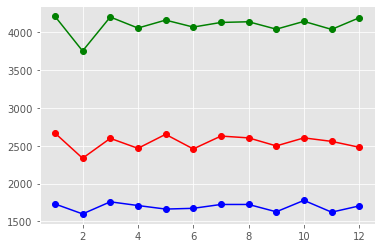

In [30]:
# create month data frame with number of transactions in each cluster in each month
def trans_to_month(cluster):
    return pd.DataFrame(sorted(cluster["month"].value_counts().to_dict().items()))[1]

cluster_month_df = pd.DataFrame()
cluster_month_df["month"] = list(range(1,13))
cluster_month_df["cluster1"] = trans_to_month(cl_1)
cluster_month_df["cluster2"] = trans_to_month(cl_2)
cluster_month_df["cluster3"] = trans_to_month(cl_3)

# plot monthly transaction
plt.plot(cluster_month_df["month"], cluster_month_df["cluster1"], color='red', marker='o')
plt.plot(cluster_month_df["month"], cluster_month_df["cluster2"], color='green', marker='o')
plt.plot(cluster_month_df["month"], cluster_month_df["cluster3"], color='blue', marker='o')

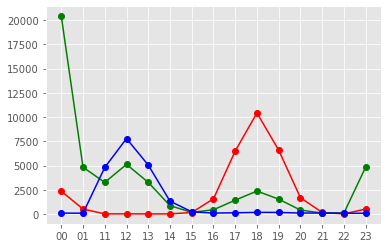

In [31]:
# create hour data frame with number of transactions in each cluster in each month
def trans_to_hour(cluster):
    return pd.DataFrame(sorted(cluster["hour"].value_counts().to_dict().items()))[1]

# list(sorted(set(df_final["hour"].values))) will return the sorted hour of our data
cluster_hour_df = pd.DataFrame()
cluster_hour_df["hour"] = list(sorted(set(df_final["hour"].values)))
cluster_hour_df["cluster1"] = trans_to_hour(cl_1)
cluster_hour_df["cluster2"] = trans_to_hour(cl_2)
cluster_hour_df["cluster3"] = trans_to_hour(cl_3)

plt.plot(cluster_hour_df["hour"], cluster_hour_df["cluster1"], color='red', marker='o')
plt.plot(cluster_hour_df["hour"], cluster_hour_df["cluster2"], color='green', marker='o')
plt.plot(cluster_hour_df["hour"], cluster_hour_df["cluster3"], color='blue', marker='o')

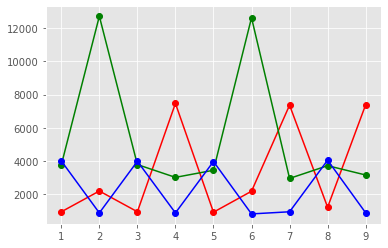

In [32]:
# create location data frame with number of transactions in each cluster in each month
def trans_to_location(cluster):
    return pd.DataFrame(sorted(cluster["location"].value_counts().to_dict().items()))[1]

# list(sorted(set(df_final["hour"].values))) will return the sorted hour of our data
cluster_location_df = pd.DataFrame()
cluster_location_df["location"] = list(sorted(set(df_final["location"].values)))
cluster_location_df["cluster1"] = trans_to_location(cl_1)
cluster_location_df["cluster2"] = trans_to_location(cl_2)
cluster_location_df["cluster3"] = trans_to_location(cl_3)

plt.plot(cluster_location_df["location"], cluster_location_df["cluster1"], color='red', marker='o')
plt.plot(cluster_location_df["location"], cluster_location_df["cluster2"], color='green', marker='o')
plt.plot(cluster_location_df["location"], cluster_location_df["cluster3"], color='blue', marker='o')

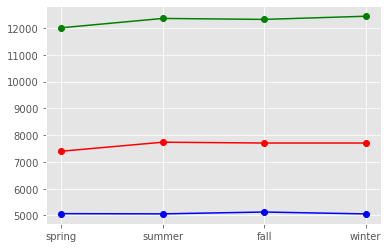

In [33]:
# create season data frame with number of transactions in each cluster in each month
season_ls = []
for i in df_final["month"]:
    if i == "02" or i == "03" or i == "04":
        season_ls.append(0) #spring
    elif i == "05" or i == "06" or i == "07":
        season_ls.append(1) #summer
    elif i == "08" or i == "09" or i == "10":
        season_ls.append(2) #fall
    else:
        season_ls.append(3) #winter

df_final['season'] = season_ls


cl_1 = df_final[df_final["clusters"] == 0]
cl_2 = df_final[df_final["clusters"] == 1]
cl_3 = df_final[df_final["clusters"] == 2]


def trans_to_season(cluster):
    return pd.DataFrame(sorted(cluster["season"].value_counts().to_dict().items()))[1]

cluster_season_df = pd.DataFrame()
cluster_season_df["season"] = ["spring",'summer','fall','winter']
cluster_season_df["cluster1"] = trans_to_season(cl_1)
cluster_season_df["cluster2"] = trans_to_season(cl_2)
cluster_season_df["cluster3"] = trans_to_season(cl_3)

# plot monthly transaction
plt.plot(cluster_season_df["season"], cluster_season_df["cluster1"], color='red', marker='o')
plt.plot(cluster_season_df["season"], cluster_season_df["cluster2"], color='green', marker='o')
plt.plot(cluster_season_df["season"], cluster_season_df["cluster3"], color='blue', marker='o')